# AEDの位置情報の分析と可視化

- AED一覧の住所から位置情報を引く(geocoding)
- 位置情報をマップに表示
- 千城台駅からの距離順にソート
- 若葉区内のAEDを絞り込む

## AED一覧の住所から位置情報を引く
住所→緯度経度を引くことをGeocodingといいます。
geocoderを使ってGoogleから位置情報を引く。

In [11]:
# まずはAEDの位置情報をpandasに読み込む
import pandas as pd

df = pd.read_excel('data/290301chibacity.xlsx', header=2, skip_footer=1)
df.head(5)

,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5
0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN
1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN
2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN
3,4.0,千葉市文化センター,千葉市中央区中央2丁目5番1号,1.0,４階 受付,NaN
4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN


In [407]:
geocoder.google("千葉市役所", cache=True).latlng
# http://www.gsi.go.jp/KOKUJYOHO/CENTER/kendata/chiba_heso.htm
# 千葉市役所
# 緯度 140°06′23
# 経度 35°36′26
# →経度緯度の順番で持ってきている。。。。

[35.6073655, 140.106334]

In [408]:
# geocoderで位置情報を引く
import geocoder

address = df["施設住所"][0]
name = df["施設名"][0]
g = geocoder.google(address)
address, name, len(g), g.latlng


('千葉市中央区千葉港2番1号', '千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ', 1, [35.6067088, 140.1081767])

### 全部の住所から位置情報を引く
API制限掛かりそうなので実際にはやらないでください。

In [12]:
from time import sleep

def find_latlng(x):
    address = x['施設住所']
    if isinstance(address, str):
        print("find:" + address)
        sleep(3)
        geo_ret = geocoder.google(address, cache=True)
        if len(geo_ret) > 0:
            latlng = geo_ret.latlng
            print("geocoding result:")
            print(latlng)
            return pd.Series([latlng[1], latlng[0]], index=['lat', 'lng'])

    return pd.Series([None, None], index=['lat', 'lng'])

latlng_df = df.apply(find_latlng, axis=1)
df = pd.concat([df, latlng_df], axis=1)
df.head()

find:千葉市中央区千葉港2番1号


geocoding result:
[35.6067088, 140.1081767]
find:千葉市中央区千葉港2番1号


geocoding result:
[35.6067088, 140.1081767]
find:千葉市中央区松波2丁目14番8号



geocoding result:
[35.6210895, 140.1063842]
find:群馬県利根郡みなかみ町相俣2325番地


geocoding result:
[36.7502905, 138.8922885]
find:千葉市中央区中央2丁目5番1号


find:千葉市中央区要町1番1号


geocoding result:
[35.6154138, 140.1202723]
find:千葉市稲毛区稲毛1丁目8番35号


geocoding result:
[35.6342328, 140.0831654]
find:千葉市中央区富士見１丁目3番2号


geocoding result:
[35.6131806, 140.1174366]
find:千葉市美浜区真砂5丁目15番2号


geocoding result:
[35.641077, 140.0625404]
find:千葉市美浜区高洲4丁目2番1号


geocoding result:
[35.63373350000001, 140.07557]
find:千葉市若葉区北谷津町327番地の1


find:千葉市若葉区みつわ台3丁目3番1号


geocoding result:
[35.6409193, 140.1362616]
find:千葉市中央区末広2丁目11番24号


find:千葉市稲毛区宮野木町2150番地4


geocoding result:
[35.6629334, 140.1060802]
find:千葉市緑区古市場町474番地の277


geocoding result:
[35.5497264, 140.1465628]
find:千葉市花見川区三角町750番地


find:千葉市若葉区中田町1200番地1


find:千葉市中央区問屋町1番20号


geocoding result:
[35.6029597, 140.1113823]
find:千葉市美浜区新港224番地1


find:千葉市若葉区下田町1005番地


geocoding result:
[35.6398044, 140.2062652]
find:千葉市若葉区下田町1005番地


geocoding result:
[35.6398044, 140.2062652]
find:千葉市中央区弁天1丁目25番1号


geocoding result:
[35.6179794, 140.1118784]
find:千葉市中央区千葉寺町1208番地2


find:千葉市中央区千葉港1番1号


geocoding result:
[35.6077613, 140.1070739]
find:千葉市中央区中央3丁目10番地8号


geocoding result:
[35.6090012, 140.1245892]
find:千葉市花見川区瑞穂1丁目1番地


geocoding result:
[35.6630577, 140.068517]
find:千葉市稲毛区穴川4丁目12番1号


geocoding result:
[35.6361899, 140.1071915]
find:千葉市若葉区桜木北2丁目1番1号


geocoding result:
[35.6340161, 140.1556526]
find:千葉市緑区おゆみ野3丁目15番地3


geocoding result:
[35.5605007, 140.1761526]
find:千葉市美浜区真砂5丁目15番1号


geocoding result:
[35.6404937, 140.0630404]
find:千葉市美浜区幸町1丁目3番9号


find:千葉市緑区平山町1762番地2


geocoding result:
[35.5756324, 140.1778827]
find:千葉市中央区松ケ丘町257番地1


geocoding result:
[35.5878813, 140.151667]
find:千葉市花見川区三角町750番地


geocoding result:
[35.6733752, 140.1162949]
find:千葉市稲毛区稲毛東6丁目19番1号


find:千葉市若葉区北谷津町333番地2


geocoding result:
[35.6107011, 140.2037537]
find:千葉市緑区誉田町2丁目15番地65


find:千葉市美浜区高洲3丁目5番6号


find:千葉市美浜区高浜4丁目8番3号


find:千葉市美浜区高浜3丁目3番1号


geocoding result:
[35.6209737, 140.0670347]
find:千葉市若葉区大宮町3816番1号


find:千葉市若葉区桜木8-31-15


geocoding result:
[35.62641110000001, 140.1651906]
find:千葉市若葉区桜木8-31-15


geocoding result:
[35.62641110000001, 140.1651906]
find:千葉市中央区亥鼻2-10-16


find:千葉市緑区鎌取町2810－8


geocoding result:
[35.5658612, 140.1724746]
find:千葉市美浜区高浜2丁目1番16号


find:千葉市中央区中央4-5-1


find:千葉県長生郡長柄町針ケ谷字中野1591番地40


geocoding result:
[35.4463019, 140.2148444]
find:千葉市若葉区北谷津町347


geocoding result:
[35.6116621, 140.2024899]
find:千葉市美浜区新港226番地１


geocoding result:
[35.6094475, 140.0726317]
find:千葉市花見川区三角町727番地1


geocoding result:
[35.6721825, 140.116504]
find:千葉市中央区新浜町4番地


geocoding result:
[35.5611405, 140.0933595]
find:千葉市稲毛区長沼原町304番地1


geocoding result:
[35.6683892, 140.1299337]
find:千葉市美浜区若葉3丁目1番地8


find:千葉市中央区中央港1丁目地内


find:千葉市中央区弁天4丁目1番1号


geocoding result:
[35.6218984, 140.1157833]
find:千葉市美浜区高浜2丁目2番1号


geocoding result:
[35.6149606, 140.0704346]
find:千葉市美浜区高浜2丁目2番1号


geocoding result:
[35.6149606, 140.0704346]
find:千葉市美浜区高浜2丁目2番1号


geocoding result:
[35.6149606, 140.0704346]
find:千葉市若葉区野呂町714番地の3


geocoding result:
[35.5884761, 140.2389965]
find:千葉市花見川区三角町656番地の3


geocoding result:
[35.6781901, 140.1182285]
find:千葉市若葉区富田町711-1


geocoding result:
[35.6067998, 140.2427669]
find:千葉市若葉区下田町971-1


find:千葉市若葉区中田町2479-35


geocoding result:
[35.6067547, 140.2220138]
find:千葉市中央区弁天3丁目1番1号


geocoding result:
[35.6198322, 140.1174722]
find:千葉市中央区弁天3丁目1番1号


geocoding result:
[35.6198322, 140.1174722]
find:千葉市中央区青葉町654番地


find:千葉市若葉区野呂町108番地


geocoding result:
[35.5774876, 140.2306648]
find:千葉市緑区土気町22番地


find:千葉市緑区土気町22番地


find:千葉市緑区おゆみ野有吉34番地1号


geocoding result:
[35.5574759, 140.1681333]
find:千葉市美浜区高浜7丁目2番地1号


find:千葉市美浜区高浜7丁目2番地4号


find:千葉市美浜区高浜7丁目1番地3号


geocoding result:
[35.6127775, 140.0683347]
find:千葉市美浜区磯辺2丁目8番地1号


geocoding result:
[35.6239898, 140.0559967]
find:千葉市美浜区高浜7丁目1番1号


geocoding result:
[35.6146994, 140.0672626]
find:千葉市美浜区高浜2丁目1番地


geocoding result:
[35.6190018, 140.069904]
find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市美浜区美浜1番地


find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市美浜区美浜1番地


geocoding result:
[35.646434, 140.0308981]
find:千葉市中央区星久喜町278番地


geocoding result:
[35.6018023, 140.1516094]
find:千葉市緑区小食土町955


geocoding result:
[35.5177487, 140.2762385]
find:千葉市中央区川崎町2-18


geocoding result:
[35.5757817, 140.1227648]
find:千葉市中央区川崎町2-18


find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


geocoding result:
[35.578201, 140.1234814]
find:千葉市中央区川崎町1-20


find:千葉県千葉市中央区川崎町1-15


geocoding result:
[35.5713487, 140.1262671]
find:千葉県千葉市中央区川崎町1-15


geocoding result:
[35.5713487, 140.1262671]
find:千葉県千葉市中央区川崎町2-18


geocoding result:
[35.5757817, 140.1227648]
find:千葉県千葉市中央区川崎町4-8


geocoding result:
[35.5770087, 140.1210169]
find:千葉市若葉区源町280番地


find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


geocoding result:
[35.6456177, 140.1298506]
find:千葉市若葉区源町280番地


find:千葉市中央区中央4丁目5番1号


geocoding result:
[35.6074181, 140.122634]
find:千葉市中央区今井1丁目14番35号


geocoding result:
[35.5826453, 140.1292918]
find:千葉市花見川区瑞穂1-1


geocoding result:
[35.6671405, 140.070725]
find:千葉市花見川区畑町1336番地の2


geocoding result:
[35.667085, 140.0793437]
find:千葉市花見川区幕張町3丁目7730番地の4


find:千葉市花見川区花島町308番地


geocoding result:
[35.6815893, 140.0969221]
find:千葉市稲毛区穴川4-12-4


geocoding result:
[35.6356232, 140.1052251]
find:千葉市稲毛区穴川4丁目12番3号


geocoding result:
[35.6362481, 140.1064138]
find:千葉市稲毛区長沼町461番地8


find:千葉市若葉区都賀4丁目20番1号


geocoding result:
[35.6343549, 140.1546305]
find:千葉市若葉区千城台西2丁目1番1号


find:千葉市若葉区貝塚2丁目19番1号


geocoding result:
[35.6333245, 140.1551305]
find:千葉市緑区鎌取町226番地１


geocoding result:
[35.5666, 140.1758468]
find:千葉市緑区おゆみ野3丁目15番地2


find:千葉市緑区あすみが丘7丁目2番地4


geocoding result:
[35.52126459999999, 140.2652728]
find:千葉市美浜区真砂5丁目15番2号


find:千葉市美浜区高洲3丁目12番1号


geocoding result:
[35.6269815, 140.0711566]
find:千葉市美浜区真砂2丁目3番1号


geocoding result:
[35.6404965, 140.0693065]
find:千葉市緑区平川町1513番１号


geocoding result:
[35.54706060000001, 140.242486]
find:千葉市中央区長洲1-2-1


geocoding result:
[35.6038104, 140.120965]
find:千葉市花見川区犢橋町107-2


find:千葉市稲毛区穴川4-12-2


geocoding result:
[35.6359454, 140.1065694]
find:千葉市若葉区金親町244-1


geocoding result:
[35.61648950000001, 140.2015035]
find:千葉市緑区おゆみ野3-15-1


geocoding result:
[35.5600035, 140.1749832]
find:千葉市美浜区真砂5-15-6


geocoding result:
[35.6405798, 140.0636986]
find:千葉市中央区新宿2丁目15番1号


geocoding result:
[35.6079841, 140.1144317]
find:千葉市中央区本町2丁目6番23号


find:千葉市中央区寒川町1丁目205番地


geocoding result:
[35.5969359, 140.1212289]
find:千葉市中央区登戸2丁目11番1号


geocoding result:
[35.6124327, 140.1076597]
find:千葉市中央区祐光1丁目25番3号


geocoding result:
[35.61502249999999, 140.1263219]
find:千葉市中央区今井3丁目15番32号


geocoding result:
[35.5783873, 140.1310137]
find:千葉市中央区都町1129番地


geocoding result:
[35.6125289, 140.144493]
find:千葉市稲毛区作草部町938番地


geocoding result:
[35.6291724, 140.120085]
find:千葉市花見川区検見川町3丁目322番地23


find:千葉市稲毛区稲毛町5丁目525番地


find:千葉市花見川区畑町1385番地


geocoding result:
[35.6653324, 140.0788965]
find:千葉市稲毛区小仲台9丁目30番1号


geocoding result:
[35.6472823, 140.0979146]
find:千葉市若葉区大宮町2655番地


find:千葉市若葉区若松町360番地の1


find:千葉市中央区大森町268番地


geocoding result:
[35.5806263, 140.1443398]
find:千葉市稲毛区稲丘町19番30号


geocoding result:
[35.6326337, 140.0880772]
find:千葉市若葉区坂月町298番地


geocoding result:
[35.6120481, 140.1815502]
find:千葉市稲毛区弥生町3番18号


geocoding result:
[35.6258051, 140.101165]
find:千葉市花見川区花園4丁目1番2号


geocoding result:
[35.6565057, 140.0738722]
find:千葉市花見川区犢橋町774番地


geocoding result:
[35.673521, 140.1080242]
find:千葉市花見川区横戸町1005番地


geocoding result:
[35.6961964, 140.1203855]
find:千葉市花見川区幕張町4丁目781番地


geocoding result:
[35.662055, 140.0539155]
find:千葉市花見川区長作町1273番地


geocoding result:
[35.6840888, 140.0738548]
find:千葉市中央区浜野町1335番地


geocoding result:
[35.5593253, 140.1402018]
find:千葉市緑区茂呂町582番地


geocoding result:
[35.541808, 140.1633955]
find:千葉市緑区誉田町1丁目27番地


geocoding result:
[35.5496572, 140.2041096]
find:千葉市稲毛区轟町3丁目4番30号


geocoding result:
[35.6302937, 140.1082862]
find:千葉市中央区鶴沢町21番1号


geocoding result:
[35.6098373, 140.1336162]
find:千葉市緑区辺田町141番地


find:千葉市中央区松ケ丘町580番地


geocoding result:
[35.5864343, 140.1554276]
find:千葉市若葉区野呂町215番地


geocoding result:
[35.5807957, 140.2311367]
find:千葉市若葉区更科町2073番地


geocoding result:
[35.6196954, 140.2276616]
find:千葉市中央区宮崎2丁目3番13号


geocoding result:
[35.583662, 140.1365409]
find:千葉市稲毛区緑町2丁目13番1号


geocoding result:
[35.6238051, 140.0975683]
find:千葉市中央区川戸町450番地


find:千葉市稲毛区山王町121番地


geocoding result:
[35.6653821, 140.1426303]
find:千葉市稲毛区小仲台6丁目34番1号


geocoding result:
[35.6396637, 140.0957511]
find:千葉市若葉区大宮台7丁目8番1号


geocoding result:
[35.5962022, 140.1823647]
find:千葉市若葉区小倉台5丁目1番1号


geocoding result:
[35.6318884, 140.172984]
find:千葉市稲毛区天台5丁目11番1号


find:千葉市美浜区稲毛海岸5丁目7番1号


geocoding result:
[35.6369858, 140.0749144]
find:千葉市稲毛区園生町446番の1


geocoding result:
[35.6466472, 140.1157932]
find:千葉市中央区星久喜町1060番地


find:千葉市花見川区幕張町4丁目681番地


geocoding result:
[35.665363, 140.0581428]
find:千葉市花見川区花見川4番1号


find:千葉市花見川区花見川6番1号


find:千葉市緑区土気町1634番地の2


geocoding result:
[35.531747, 140.272977]
find:千葉市中央区弁天1丁目21番2号


geocoding result:
[35.6164713, 140.112609]
find:千葉市若葉区桜木町220番地


geocoding result:
[35.6188563, 140.1536283]
find:千葉市若葉区千城台北1丁目4番1号


geocoding result:
[35.6288442, 140.1839216]
find:千葉市若葉区千城台西2丁目21番1号


geocoding result:
[35.6227335, 140.1824109]
find:千葉市稲毛区宮野木町1798番地の2


geocoding result:
[35.6548123, 140.1077801]
find:千葉市中央区塩田町316番地の1


geocoding result:
[35.5589585, 140.1312863]
find:千葉市中央区仁戸名町380番地


find:千葉市花見川区こてはし台2丁目28番1号


geocoding result:
[35.6878891, 140.1225358]
find:千葉市花見川区花見川1番1号


geocoding result:
[35.6854472, 140.0891422]
find:千葉市花見川区西小中台3番1号


geocoding result:
[35.6509758, 140.0863657]
find:千葉市花見川区さつきが丘1丁目7番地


geocoding result:
[35.6643218, 140.0991502]
find:千葉市花見川区さつきが丘2丁目14番地


geocoding result:
[35.6671268, 140.0913148]
find:千葉市若葉区貝塚町1093番地


geocoding result:
[35.6286492, 140.1450811]
find:千葉市中央区大巌寺町375番地


find:千葉市美浜区幕張西2丁目8番1号


geocoding result:
[35.6648209, 140.0378918]
find:千葉市若葉区大宮町2082番地


find:千葉市稲毛区園生町1385番地


find:千葉市稲毛区園生町588番地


geocoding result:
[35.6485965, 140.1071497]
find:千葉市若葉区千城台東1丁目15番1号


geocoding result:
[35.6223501, 140.1914709]
find:千葉市若葉区千城台南1丁目19番1号


geocoding result:
[35.6183198, 140.1894491]
find:千葉市稲毛区小仲台8丁目15番1号


find:千葉市美浜区幸町1丁目10番1号


geocoding result:
[35.6118155, 140.0989465]
find:千葉市美浜区高洲3丁目3番11号


geocoding result:
[35.6266982, 140.074123]
find:千葉市稲毛区作草部町1298番地の1


geocoding result:
[35.6314778, 140.1229957]
find:千葉市美浜区高洲1丁目15番1号


find:千葉市美浜区真砂1丁目12番15号


find:千葉市美浜区高浜1丁目4番1号


geocoding result:
[35.62006300000001, 140.0760257]
find:千葉市美浜区稲毛海岸2丁目3番2号


geocoding result:
[35.6299396, 140.0843499]
find:千葉市花見川区作新台7丁目2番1号


geocoding result:
[35.6878052, 140.0844426]
find:千葉市若葉区みつわ台3丁目5番1号


find:千葉市緑区誉田町2丁目21番地の84


find:千葉市美浜区幸町2丁目12番12号


geocoding result:
[35.6215328, 140.0907162]
find:千葉市緑区大木戸町317番地


geocoding result:
[35.531021, 140.250313]
find:千葉市若葉区千城台東3丁目18番1号


geocoding result:
[35.6173644, 140.1961151]
find:千葉市花見川区柏井町1486番地の1


geocoding result:
[35.69932650000001, 140.1036651]
find:千葉市若葉区みつわ台1丁目17番1号


geocoding result:
[35.63408070000001, 140.1305675]
find:千葉市若葉区若松台2丁目25番1号


geocoding result:
[35.6503499, 140.1715139]
find:千葉市花見川区幕張町3丁目7718番地


find:千葉市美浜区高浜4丁目8番2号


geocoding result:
[35.623393, 140.0695484]
find:千葉市若葉区都賀の台2丁目13番1号


geocoding result:
[35.643819, 140.1415224]
find:千葉市花見川区幕張本郷4丁目8番1号


geocoding result:
[35.6681264, 140.0504268]
find:千葉市美浜区磯辺1丁目25番1号


geocoding result:
[35.629831, 140.064196]
find:千葉市若葉区源町541番地の6


find:千葉市緑区越智町705番地の359


find:千葉市花見川区朝日ケ丘2丁目6番1号


geocoding result:
[35.6591665, 140.0854461]
find:千葉市中央区生実町1928番地


geocoding result:
[35.5598532, 140.1479146]
find:千葉市緑区おゆみ野中央4丁目3番地


geocoding result:
[35.5543319, 140.1745445]
find:千葉市緑区あすみが丘4丁目16番地


find:千葉市花見川区幕張本郷3丁目22番6号


geocoding result:
[35.6661932, 140.0459467]
find:千葉市緑区おゆみ野4丁目45番地


geocoding result:
[35.5553513, 140.1821138]
find:千葉市緑区あすみが丘6丁目38番地


geocoding result:
[35.514296, 140.2627261]
find:千葉市緑区おゆみ野1丁目53番地


find:千葉市美浜区打瀬1丁目3番1号


geocoding result:
[35.6420794, 140.0473165]
find:千葉市緑区おゆみ野南5丁目31番地


geocoding result:
[35.5474798, 140.1730031]
find:千葉市緑区あすみが丘6丁目2番地


find:千葉市緑区おゆみ野中央1丁目26番地


geocoding result:
[35.5575509, 140.1636111]
find:千葉市花見川区瑞穂1丁目2番地


find:千葉市美浜区打瀬3丁目地内


geocoding result:
[35.6373356, 140.041404]
find:千葉市緑区おゆみ野南4丁目26番地


geocoding result:
[35.54463, 140.1684562]
find:千葉市花見川区8番1号


geocoding result:
[35.6840833, 140.085787]
find:千葉市美浜区打瀬2丁目18番地1


geocoding result:
[35.6382826, 140.0444557]
find:千葉市美浜区高洲2丁目2番20号


geocoding result:
[35.625118, 140.0798448]
find:千葉市美浜区真砂2丁目13番1号


geocoding result:
[35.6379524, 140.0670123]
find:千葉市美浜区真砂4丁目5番1号


geocoding result:
[35.6423824, 140.0589657]
find:千葉市若葉区加曽利町961番地の5


geocoding result:
[35.6139095, 140.1575336]
find:千葉市中央区末広2丁目10番1号


geocoding result:
[35.5967332, 140.126595]
find:千葉市中央区葛城2丁目9番1号


geocoding result:
[35.6008107, 140.1308586]
find:千葉市中央区椿森4丁目1番1号


geocoding result:
[35.6224293, 140.1208661]
find:千葉市稲毛区緑町2丁目3番1号


geocoding result:
[35.6226441, 140.0968295]
find:千葉市稲毛区小仲台9丁目46番2号


geocoding result:
[35.646402, 140.0999783]
find:千葉市花見川区花園4丁目1番1号


geocoding result:
[35.6545865, 140.0737307]
find:千葉市中央区問屋町1番73号


geocoding result:
[35.6047203, 140.1097184]
find:千葉市中央区白旗1丁目5番3号


geocoding result:
[35.57721799999999, 140.1379072]
find:千葉市花見川区三角町656番地の2


geocoding result:
[35.6776929, 140.1167731]
find:千葉市花見川区幕張町4丁目45番地


geocoding result:
[35.6628716, 140.0590539]
find:千葉市中央区南生実町258番地


geocoding result:
[35.5571228, 140.1441097]
find:千葉市緑区誉田町1丁目138番地


geocoding result:
[35.5524735, 140.2027652]
find:千葉市稲毛区轟町3丁目5番14号


geocoding result:
[35.6311407, 140.1080195]
find:千葉市中央区松ケ丘町440番地


geocoding result:
[35.5879286, 140.1527613]
find:千葉市若葉区野呂町623番地


geocoding result:
[35.5857119, 140.228559]
find:千葉市若葉区更科町2112番地


find:千葉市中央区川戸町443番地


geocoding result:
[35.5839538, 140.1678549]
find:千葉市稲毛区稲毛町5丁目120番地


find:千葉市稲毛区千草台2丁目3番1号


find:千葉市花見川区花見川6番2号


geocoding result:
[35.688997, 140.1021574]
find:千葉市美浜区幸町2丁目12番7号


geocoding result:
[35.6211633, 140.0901829]
find:千葉市緑区土気町1400番地


geocoding result:
[35.5410154, 140.2731879]
find:千葉市若葉区千城台西2丁目20番1号


find:千葉市中央区星久喜町823番地


find:千葉市花見川区こてはし台5丁目15番1号


geocoding result:
[35.6915469, 140.1188915]
find:千葉市花見川区さつきが丘2丁目15番地


geocoding result:
[35.668971, 140.0914425]
find:千葉市美浜区高洲2丁目3番18号


geocoding result:
[35.6232487, 140.0774728]
find:千葉市若葉区大宮町2077番地


geocoding result:
[35.5862977, 140.1867207]
find:千葉市稲毛区園生町1397番地


geocoding result:
[35.6524415, 140.1274006]
find:千葉市美浜区幕張西2丁目9番1号


geocoding result:
[35.6634849, 140.0374613]
find:千葉市稲毛区作草部町1306番地の1


find:千葉市若葉区千城台南1丁目20番1号


geocoding result:
[35.6186864, 140.1908212]
find:千葉市美浜区高洲4丁目4番3号


geocoding result:
[35.6326114, 140.0717703]
find:千葉市若葉区みつわ台2丁目41番1号


geocoding result:
[35.635089, 140.1312701]
find:千葉市花見川区犢橋町213番地の4


geocoding result:
[35.6643083, 140.1109658]
find:千葉市花見川区天戸町1429番地


find:千葉市若葉区若松町2106番地の2


geocoding result:
[35.6357521, 140.1697287]
find:千葉市美浜区高浜4丁目8番1号


find:千葉市美浜区幸町1丁目10番2号


find:千葉市若葉区若松町774番地


geocoding result:
[35.6530175, 140.1426111]
find:千葉市美浜区稲毛海岸2丁目3番3号


geocoding result:
[35.6327947, 140.0818528]
find:千葉市花見川区朝日ケ丘2丁目4番1号


geocoding result:
[35.6564696, 140.087596]
find:千葉市若葉区貝塚町1340番地の1


geocoding result:
[35.6174309, 140.139657]
find:千葉市緑区越智町651番地


geocoding result:
[35.5335315, 140.2411307]
find:千葉市緑区おゆみ野中央4丁目2番地


geocoding result:
[35.5548235, 140.171489]
find:千葉市花見川区幕張本郷5丁目18番1号


geocoding result:
[35.6719647, 140.0477297]
find:千葉市緑区あすみが丘4丁目38番地


geocoding result:
[35.52472789999999, 140.261748]
find:千葉市美浜区打瀬3丁目地内


geocoding result:
[35.6373356, 140.041404]
find:千葉市美浜区高浜3丁目1番1号


find:千葉市緑区おゆみ野2丁目41番地


geocoding result:
[35.5601562, 140.1706443]
find:千葉市緑区あすみが丘8丁目26番地


find:千葉市美浜区真砂5丁目18番2号


find:千葉市緑区おゆみ野南5丁目25番地


geocoding result:
[35.5445497, 140.1769975]
find:千葉市若葉区大宮町1066番地の1


geocoding result:
[35.5975441, 140.1670466]
find:千葉市稲毛区轟町3丁目6番25号


find:千葉市稲毛区小仲台9丁目46番1号


geocoding result:
[35.6448049, 140.0999755]
find:千葉市美浜区高浜3丁目1番1号


geocoding result:
[35.6204099, 140.0680236]
find:千葉市美浜区磯辺4丁目16番1号


geocoding result:
[35.6315558, 140.058227]
find:千葉市美浜区磯辺7丁目1番1号


geocoding result:
[35.6326807, 140.0541635]
find:千葉市美浜区真砂5丁目18番地1


geocoding result:
[35.64397940000001, 140.0615265]
find:千葉市中央区弁天3丁目7番7号


find:千葉市稲毛区小仲台5丁目7番1号


geocoding result:
[35.6393639, 140.0990674]
find:千葉市若葉区更科町2254番地の1


geocoding result:
[35.6178316, 140.227809]
find:千葉市中央区松ケ丘町257-2


geocoding result:
[35.5881452, 140.1518253]
find:千葉市中央区生実町67-1　


geocoding result:
[35.559617, 140.1418237]
find:千葉市中央区新宿2-16-14


geocoding result:
[35.6068509, 140.1137957]
find:千葉市中央区宮崎2-5-22


geocoding result:
[35.5805983, 140.1368241]
find:千葉市中央区葛城2-9-2


find:千葉市中央区末広3-2-2


geocoding result:
[35.5939945, 140.1251813]
find:千葉市中央区椿森6-1-11


geocoding result:
[35.6201409, 140.12383]
find:千葉市中央区川戸町403-1


geocoding result:
[35.5818901, 140.1668771]
find:千葉市中央区星久喜町615-7


find:千葉市花見川区幕張町4-602


find:千葉市花見川区花園3-12-8


find:千葉市花見川区検見川町3-322-25


find:千葉市花見川区柏井町1590-8


geocoding result:
[35.6955713, 140.0996324]
find:千葉市花見川区さつきが丘1-32-4


geocoding result:
[35.6650855, 140.0969254]
find:千葉市花見川区横戸町861-4


geocoding result:
[35.6929412, 140.1210301]
find:千葉市花見川区長作町1722-1


find:千葉市花見川区朝日ケ丘1-1-30


geocoding result:
[35.6556142, 140.0892098]
find:千葉市花見川区幕張本郷2-19-33


geocoding result:
[35.6681872, 140.0391861]
find:千葉市稲毛区稲毛1-10-17


geocoding result:
[35.6365525, 140.0833581]
find:千葉市稲毛区黒砂2-4-18


geocoding result:
[35.62647949999999, 140.094024]
find:千葉市稲毛区轟町1-12-3


geocoding result:
[35.6246864, 140.1097059]
find:千葉市稲毛区天台3-16-5


geocoding result:
[35.6337881, 140.1168378]
find:千葉市稲毛区園生町384-93


geocoding result:
[35.6541018, 140.1197872]
find:千葉市稲毛区六方町55-29


find:千葉市稲毛区作草部2-8-53


find:千葉市稲毛区宮野木町1807-3


geocoding result:
[35.6578397, 140.1072329]
find:千葉市若葉区千城台西2-1-1


geocoding result:
[35.6221501, 140.1869631]
find:千葉市若葉区加曽利町892-6


geocoding result:
[35.6121375, 140.1520425]
find:千葉市若葉区大宮町3221-2


geocoding result:
[35.5965577, 140.1810953]
find:千葉市若葉区みつわ台3-12-17


find:千葉市若葉区若松町2117-2


find:千葉市若葉区桜木3-17-29


geocoding result:
[35.6227754, 140.1603496]
find:千葉市緑区誉田町1-789-49


geocoding result:
[35.5498572, 140.2032013]
find:千葉市緑区富岡町290-1


geocoding result:
[35.5436994, 140.1638509]
find:千葉市緑区土気町1631-7


geocoding result:
[35.5307471, 140.2736131]
find:千葉市緑区越智町822-7


geocoding result:
[35.535245, 140.236559]
find:千葉市緑区おゆみ野中央2-7-6


find:千葉市美浜区稲毛海岸3-4-1


find:千葉市美浜区幕張西2-6-2


geocoding result:
[35.6655929, 140.0363642]
find:千葉市美浜区磯辺1-48-1


find:千葉市美浜区幸町2-12-14


geocoding result:
[35.6207302, 140.0923244]
find:千葉市美浜区高浜1-8-3


geocoding result:
[35.6202462, 140.0733982]
find:千葉市美浜区高浜3-2-3


geocoding result:
[35.6208015, 140.0658737]
find:千葉市若葉区桜木8-33-1


find:千葉市中央区亥鼻1-6-1


geocoding result:
[35.6044881, 140.1272227]
find:千葉市中央区南生実町1210


geocoding result:
[35.55807, 140.1511707]
find:千葉市中央区中央4丁目5番1号


geocoding result:
[35.6074181, 140.122634]
find:千葉市中央区中央4丁目5番1号


geocoding result:
[35.6074181, 140.122634]
find:千葉市中央区中央4丁目5番1号


geocoding result:
[35.6074181, 140.122634]
find:千葉市中央区弁天3丁目7番7号


find:千葉市中央区都町3丁目11番3号


geocoding result:
[35.6082488, 140.1386882]
find:千葉市花見川区こてはし台5丁目9番7号


geocoding result:
[35.6892472, 140.1199777]
find:千葉市稲毛区小仲台5丁目1番1号


geocoding result:
[35.6392583, 140.0969899]
find:千葉市若葉区千城台西2丁目1番1号


geocoding result:
[35.6221501, 140.1869631]
find:千葉市中央区白旗1丁目3番16号


find:千葉市花見川区花見川3番31棟101号


find:千葉市若葉区西都賀2丁目8番8号


geocoding result:
[35.6371926, 140.1442446]
find:千葉市若葉区野呂町622番地10


geocoding result:
[35.5838982, 140.2302783]
find:千葉市美浜区打瀬2丁目13番地


geocoding result:
[35.6397741, 140.0470416]


csvから緯度経度付きのデータを読み込みます。

In [319]:
df = pd.read_csv("data/aed_latlng.csv")
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
3,3,4.0,千葉市文化センター,千葉市中央区中央2丁目5番1号,1.0,４階 受付,NaN,NaN,NaN
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272


## 位置情報をマップに表示
foliumを使って先程取得した位置情報をMapに表示します。

In [320]:
import folium
center = g.latlng
m = folium.Map(
    location=center,
    zoom_start=20
)

# htmlタグも使える
# folium.Marker(g.latlng, popup="<i>"+name+"</i>").add_to(m)

folium.Marker(g.latlng, popup=name).add_to(m)

m

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZDJmZGFlNzVmOWZmNGJkYWJhOGExNDI4OGQ4NzAyOTggewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwX2QyZmRhZTc1ZjlmZjRiZGFiYThhMTQyODhkODcwMjk4IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF9kMmZkYWU3NWY5ZmY0YmRhYmE4YTE0Mjg4ZDg3MDI5OCA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF9kMmZkYWU3NWY5ZmY0YmRhYmE4YTE0Mjg4ZDg3MDI5OCcsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjA2NzA4OCwxNDAuMTA4MTc2N10sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAyMCwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfMmEzOTc5MTlkN2JhNDg0ZWJkYzI4ZTMwZjNkNTViNzIgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfZDJmZGFlNzVmOWZmNGJkYWJhOGExNDI4OGQ4NzAyOTgpOwogICAgICAgIAogICAgCgogICAgICAgICAgICB2YXIgbWFya2VyXzllMWVkZDMxMWU0NDQ3MTFiNmU3ODgwYzNmYzgwZWQyID0gTC5tYXJrZXIoCiAgICAgICAgICAgICAgICB

In [321]:
# geo_jsonを読みこむこともできる
m = folium.Map(
    location=center,
    zoom_start=20
)

folium.GeoJson(
    g.geojson
).add_to(m)

m


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfYTkzZGJiZGIwODU3NGM5ZmI0NmNmN2Q5M2Q1NTk0ZTggewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwX2E5M2RiYmRiMDg1NzRjOWZiNDZjZjdkOTNkNTU5NGU4IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF9hOTNkYmJkYjA4NTc0YzlmYjQ2Y2Y3ZDkzZDU1OTRlOCA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF9hOTNkYmJkYjA4NTc0YzlmYjQ2Y2Y3ZDkzZDU1OTRlOCcsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjA2NzA4OCwxNDAuMTA4MTc2N10sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAyMCwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfNGM4M2I5MDJkNjk4NGY1ZGFlNDc0OWIxYTEwYmI1NDcgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfYTkzZGJiZGIwODU3NGM5ZmI0NmNmN2Q5M2Q1NTk0ZTgpOwogICAgICAgIAogICAgCgogICAgICAgICAgICAKCiAgICAgICAgICAgICAgICB2YXIgZ2VvX2pzb25fMTZiMTU5ZjY2MjljNDc1YzgxMmYwM2E3YjYzYjg5MjEgPSBMLmdlb0p

### 複数の地点をMAPに出す

In [323]:
# 位置情報がとれなかったデータを削除する
df = df.dropna(axis=0, subset=['lat'])
df.head()


,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


In [324]:
# 千葉駅の緯度経度を引く
chiba_station = geocoder.google("千葉駅", cache=True)
chiba_station_latlng = chiba_station.latlng

m = folium.Map(location=chiba_station_latlng,
               zoom_start=15)
# 列ごとにloop
for index, row in df.iterrows():
    folium.Marker(location=[row['lng'], row['lat']], popup=row["施設名"]).add_to(m)
m


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfN2IwY2MzYWQ3YjQzNGQwODhkMjBhNWYzNzBkYzQ4YzYgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwXzdiMGNjM2FkN2I0MzRkMDg4ZDIwYTVmMzcwZGM0OGM2IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF83YjBjYzNhZDdiNDM0ZDA4OGQyMGE1ZjM3MGRjNDhjNiA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF83YjBjYzNhZDdiNDM0ZDA4OGQyMGE1ZjM3MGRjNDhjNicsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjEyOTI1OSwxNDAuMTEzNDc4MV0sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAxNSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfYWE2ODVjMzE0ZDcyNDY1M2IzODNjMjNjMWEzMGZiMDQgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfN2IwY2MzYWQ3YjQzNGQwODhkMjBhNWYzNzBkYzQ4YzYpOwogICAgICAgIAogICAgCgogICAgICAgICAgICB2YXIgbWFya2VyXzgwMTE0NDFmNDc5ZDQ0N2E4OWJmYWQ4NjRhZjIyODliID0gTC5tYXJrZXIoCiAgICAgICAgICAgICAgICB

## 若葉区内のAEDを探す
geopandasを使って位置情報の絞込を行う

In [7]:
%matplotlib inline
import geopandas as gpd
# libspatialindex_c が必要かも

まずはgeopandasが持っているサンプルデータを表示してみる

In [326]:
# geopandasが持ってるdetasetから世界地図を読み込んでみる
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


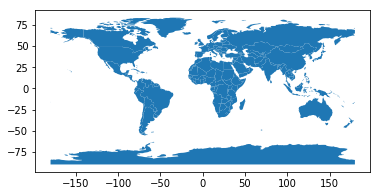

In [17]:
# 世界地図のポリゴンが表示される
world.plot()

In [213]:
# 世界地図の座標系はこれ
world.crs

{'init': 'epsg:4326'}

In [309]:
# ポリゴンの中心点を作る
world['centroid'] = world.centroid
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",POINT (20.03242643144321 41.14135330604877)
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",POINT (54.20671476159633 23.86863365334761)
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,POINT (-65.17536077114174 -35.44682148949509)


再びAEDの情報を見ていく

In [330]:
#  AEDの位置情報を読み込む
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


In [331]:
# うまく緯度経度が取れなかったやつを削除する
df = df.dropna(axis=0, subset=['lat'])
df.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165


In [333]:
# geopandasの内部で使っているshapely.geometry.Point型に変換する
from shapely.geometry import Point

geometry = df.apply(lambda x: Point(x['lat'], x['lng']), axis=1)
geometry.head()

0           POINT (140.1081767 35.6067088)
1           POINT (140.1063842 35.6210895)
2    POINT (138.8922885 36.75029050000001)
4           POINT (140.1202723 35.6154138)
5           POINT (140.0831654 35.6342328)
dtype: object

In [336]:
# dfと先程のgeometry列をつなげてgeoDataframeを作る
# 座標系はepsg:4612
# これを設定しないとfoliumを使ってmapに出せない

gdf = gpd.GeoDataFrame(df, geometry=geometry,crs= {'init' :'epsg:4612'})
gdf.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177,POINT (140.1081767 35.6067088)
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384,POINT (140.1063842 35.6210895)
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289,POINT (138.8922885 36.75029050000001)
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272,POINT (140.1202723 35.6154138)
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165,POINT (140.0831654 35.6342328)


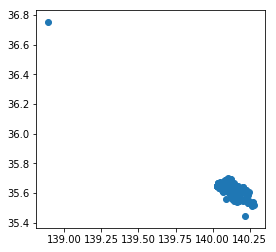

In [337]:
# plotしてみる
gdf.plot()

In [344]:
import geocoder
import folium

chiba_station = geocoder.google("千葉駅")
chiba_station_latlng = chiba_station.latlng

m = folium.Map(
    location=chiba_station_latlng,
    zoom_start=13
)

# folium.GeoJson()にgeoDataframeやgeoSeriesのインスタンスを入れてもfolium.features.GeoJsonが作れるっぽい
folium.GeoJson(gdf).add_to(m)

m


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfNTgyNThjNzY1MmY0NDIzN2FkYzFjYzQ1NTBlNmQ1YjAgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwXzU4MjU4Yzc2NTJmNDQyMzdhZGMxY2M0NTUwZTZkNWIwIiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF81ODI1OGM3NjUyZjQ0MjM3YWRjMWNjNDU1MGU2ZDViMCA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF81ODI1OGM3NjUyZjQ0MjM3YWRjMWNjNDU1MGU2ZDViMCcsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjEyOTI1OSwxNDAuMTEzNDc4MV0sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAxMywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfZjBhNTQ5MmY4NTk3NDNhNDk5OWRjNjAxODc4ZjY0ZjAgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfNTgyNThjNzY1MmY0NDIzN2FkYzFjYzQ1NTBlNmQ1YjApOwogICAgICAgIAogICAgCgogICAgICAgICAgICAKCiAgICAgICAgICAgICAgICB2YXIgZ2VvX2pzb25fNWZjZjllNjk4YzhjNDc2YmI4ZDNhNzdiY2Y3MzA0OTggPSBMLmdlb0p

In [106]:
import geocoder
import folium
chiba_station = geocoder.google("千葉駅")
chiba_station_latlng = chiba_station.latlng
gdf.distance(Point(chiba_station_latlng)).head()

0    0.007823
1    0.012323
2    1.670271
4    0.007104
5    0.038454
dtype: float64

In [107]:
gdf["distance"] = gdf.distance(Point(chiba_station_latlng))

In [115]:
gdf.sort_values(['distance']).head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lat,lng,geometry,distance
6,6,7.0,千葉市文化交流プラザ,千葉市中央区富士見１丁目3番2号,1.0,７階 受付,NaN,35.613181,140.117437,POINT (35.61318060000001 140.1174366),0.003534
135,135,100.0,千葉市立新宿小学校,千葉市中央区新宿2丁目15番1号,1.0,体育館,NaN,35.607984,140.114432,POINT (35.6079841 140.1144317),0.003638
312,312,277.0,千葉市新宿公民館,千葉市中央区新宿2-16-14,1.0,1階 事務室 カウンター,NaN,35.606851,140.113796,POINT (35.6068509 140.1137957),0.004790
182,182,147.0,千葉市立弁天小学校,千葉市中央区弁天1丁目21番2号,1.0,体育館,NaN,35.616471,140.112609,POINT (35.6164713 140.112609),0.005129
138,138,103.0,千葉市立登戸小学校,千葉市中央区登戸2丁目11番1号,1.0,体育館,NaN,35.612433,140.107660,POINT (35.61243270000001 140.1076597),0.006657


In [223]:
gdf.crs = {'init' :'epsg:4612'}
gdf.crs

{'init': 'epsg:4612'}

In [148]:
# geojsonをMapに出すのがうまくいかない
mapa = folium.Map(location=chiba_station_latlng,
                  zoom_start=13)
# 列ごとにloop
for point in gdf.geometry:
    folium.Marker([point.x,point.y]).add_to(mapa)
#     
# folium.GeoJson("data/aed_latlng.",name='geojson')# .add_to(mapa)
mapa


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfOWRmY2MxMDM4NTFjNDNlNWI4MDUzZTllZjQ2MGQyZjQgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwXzlkZmNjMTAzODUxYzQzZTViODA1M2U5ZWY0NjBkMmY0IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF85ZGZjYzEwMzg1MWM0M2U1YjgwNTNlOWVmNDYwZDJmNCA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF85ZGZjYzEwMzg1MWM0M2U1YjgwNTNlOWVmNDYwZDJmNCcsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjExNjE4LDE0MC4xMTQyNjddLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgem9vbTogMTMsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBtYXhCb3VuZHM6IGJvdW5kcywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGxheWVyczogW10sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB3b3JsZENvcHlKdW1wOiBmYWxzZSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGNyczogTC5DUlMuRVBTRzM4NTcKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgfSk7CiAgICAgICAgICAgIAogICAgICAgIAogICAgCiAgICAgICAgICAgIHZhciB0aWxlX2xheWVyXzYwMzA3NzNjNTc5YTQyNzU4NTQ4NDZjYjc4ODcxZDAyID0gTC50aWxlTGF5ZXIoCiAgICAgICAgICAgICAgICAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLAogICAgICAgICAgICAgICAgewogICJhdHRyaWJ1dGlvbiI6IG51bGwsCiAgImRldGVjdFJldGluYSI6IGZhbHNlLAogICJtYXhab29tIjogMTgsCiAgIm1pblpvb20iOiAxLAogICJub1dyYXAiOiBmYWxzZSwKICAic3ViZG9tYWlucyI6ICJhYmMiCn0KICAgICAgICAgICAgICAgICkuYWRkVG8obWFwXzlkZmNjMTAzODUxYzQzZTViODA1M2U5ZWY0NjBkMmY0KTsKICAgICAgICAKICAgIAoKICAgICAgICAgICAgdmFyIG1hcmtlcl8yODdhZTAwZjM5MDE0OWQxODQxMTczY2FkODE1YTNhZiA9IEwubWFya2VyKAogICAgICAgICAgICAgICAgWzM

### 若葉区のPolygonを作る

In [346]:
chiba_ken = gpd.read_file("data/千葉県の市区町村.geojson")

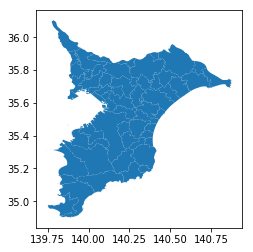

In [347]:
chiba_ken.plot()

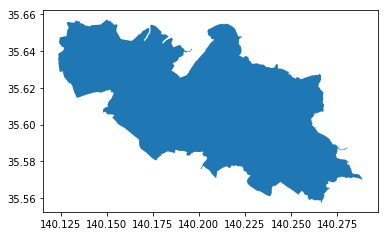

In [351]:
wakaba_ku = chiba_ken[chiba_ken["N03_004"]== "若葉区"]
# 処理しやすいようにindexをreset
wakaba_ku.reset_index(drop=True, inplace=True)
wakaba_ku.plot()

In [396]:
# wakaba_ku.centroidがGeoDataframe型なのでindexの0を指定する
wakaba_ku_centroid = wakaba_ku.centroid[0]
# wakaba_ku_polygon.to_crs(epsg='4612')

wakaba_ku_map = folium.Map(location=[wakaba_ku_centroid.y,wakaba_ku_centroid.x],
                  zoom_start=13)
folium.GeoJson(wakaba_ku).add_to(wakaba_ku_map)

wakaba_ku_map

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZjAwZTBjNTIwYzg2NDk1Y2FhNjQwMGEyMGFkYzlhZjcgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwX2YwMGUwYzUyMGM4NjQ5NWNhYTY0MDBhMjBhZGM5YWY3IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF9mMDBlMGM1MjBjODY0OTVjYWE2NDAwYTIwYWRjOWFmNyA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF9mMDBlMGM1MjBjODY0OTVjYWE2NDAwYTIwYWRjOWFmNycsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjEwNDAyNjMzODY2NjU2LDE0MC4yMDUwNzQ4NDc4NzU2Nl0sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAxMywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfYzViZjlkNTdmZDI4NDU4MGE2MWZmOWExMDk0MjFjZDUgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfZjAwZTBjNTIwYzg2NDk1Y2FhNjQwMGEyMGFkYzlhZjcpOwogICAgICAgIAogICAgCgogICAgICAgICAgICAKCiAgICAgICAgICAgICAgICB2YXIgZ2VvX2pzb25fZDEwMTI1ZDZlNGY5NDljODhhNWZiODJhMjg

In [397]:
gdf.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
0,0,1.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ,千葉市中央区千葉港2番1号,1.0,４階 事務室,NaN,35.606709,140.108177,POINT (140.1081767 35.6067088)
1,1,2.0,千葉市中央ｺﾐｭﾆﾃｨｾﾝﾀｰ松波分室,千葉市中央区松波2丁目14番8号\n,1.0,事務室,NaN,35.621090,140.106384,POINT (140.1063842 35.6210895)
2,2,3.0,千葉市高原千葉村,群馬県利根郡みなかみ町相俣2325番地,1.0,管理事務所,NaN,36.750291,138.892289,POINT (138.8922885 36.75029050000001)
4,4,5.0,千葉市民会館,千葉市中央区要町1番1号,1.0,１階 受付事務室内,NaN,35.615414,140.120272,POINT (140.1202723 35.6154138)
5,5,6.0,千葉市民ギャラリー・いなげ,千葉市稲毛区稲毛1丁目8番35号,1.0,１階 事務室内,NaN,35.634233,140.083165,POINT (140.0831654 35.6342328)


### 絞込を行う

In [405]:
# Polygonのインスタンスが取れていること
wakaba_ku_polygon = wakaba_ku['geometry'][0]
wakaba_ku_polygon

In [402]:
within_wakaba_ku = gdf[gdf.within(wakaba_ku_polygon)]
within_wakaba_ku.head()

,Unnamed: 0,番号,施設名,施設住所,ＡＥＤ 設置 台数,設置場所,Unnamed: 5,lng,lat,geometry
10,10,11.0,千葉市みつわ台体育館,千葉市若葉区みつわ台3丁目3番1号,1.0,１階 事務室,NaN,35.640919,140.136262,POINT (140.1362616 35.6409193)
18,18,19.0,千葉市民ゴルフ場,千葉市若葉区下田町1005番地,2.0,クラブハウス棟フロント,NaN,35.639804,140.206265,POINT (140.2062652 35.6398044)
19,19,NaN,千葉市民ゴルフ場,千葉市若葉区下田町1005番地,NaN,クラブハウス棟マスター室,NaN,35.639804,140.206265,POINT (140.2062652 35.6398044)
26,26,26.0,若葉区役所,千葉市若葉区桜木北2丁目1番1号,1.0,１階 守衛室,NaN,35.634016,140.155653,POINT (140.1556526 35.6340161)
34,34,34.0,千葉市若葉いきいきプラザ,千葉市若葉区北谷津町333番地2,1.0,１階 事務室,NaN,35.610701,140.203754,POINT (140.2037537 35.6107011)


In [404]:
folium.GeoJson(within_wakaba_ku).add_to(wakaba_ku_map)
wakaba_ku_map

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZjAwZTBjNTIwYzg2NDk1Y2FhNjQwMGEyMGFkYzlhZjcgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwX2YwMGUwYzUyMGM4NjQ5NWNhYTY0MDBhMjBhZGM5YWY3IiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF9mMDBlMGM1MjBjODY0OTVjYWE2NDAwYTIwYWRjOWFmNyA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF9mMDBlMGM1MjBjODY0OTVjYWE2NDAwYTIwYWRjOWFmNycsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMzUuNjEwNDAyNjMzODY2NjU2LDE0MC4yMDUwNzQ4NDc4NzU2Nl0sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB6b29tOiAxMywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIG1heEJvdW5kczogYm91bmRzLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbGF5ZXJzOiBbXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHdvcmxkQ29weUp1bXA6IGZhbHNlLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NwogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB9KTsKICAgICAgICAgICAgCiAgICAgICAgCiAgICAKICAgICAgICAgICAgdmFyIHRpbGVfbGF5ZXJfYzViZjlkNTdmZDI4NDU4MGE2MWZmOWExMDk0MjFjZDUgPSBMLnRpbGVMYXllcigKICAgICAgICAgICAgICAgICdodHRwczovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAub3JnL3t6fS97eH0ve3l9LnBuZycsCiAgICAgICAgICAgICAgICB7CiAgImF0dHJpYnV0aW9uIjogbnVsbCwKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsCiAgIm1heFpvb20iOiAxOCwKICAibWluWm9vbSI6IDEsCiAgIm5vV3JhcCI6IGZhbHNlLAogICJzdWJkb21haW5zIjogImFiYyIKfQogICAgICAgICAgICAgICAgKS5hZGRUbyhtYXBfZjAwZTBjNTIwYzg2NDk1Y2FhNjQwMGEyMGFkYzlhZjcpOwogICAgICAgIAogICAgCgogICAgICAgICAgICAKCiAgICAgICAgICAgICAgICB2YXIgZ2VvX2pzb25fZDEwMTI1ZDZlNGY5NDljODhhNWZiODJhMjg